In [87]:
# from google.colab import drive
# drive.mount('/content/drive')

# Install Relevant Libraries

In [88]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import Relevant libraries

In [89]:
import pandas as pd

# Load the data

In [90]:
credit = pd.read_csv('German_Credit.csv')
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [91]:
len(credit)

1000

In [92]:
credit['Risk'].value_counts()

Risk
0    700
1    300
Name: count, dtype: int64

### credit Information

In [93]:
# Get relevant information about the credit data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


### Check for Missing Values

In [94]:
# Check for missing values - Shows no missing values
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Data Description - Numerical Values

In [95]:
# Description of Numerical values
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


In [96]:
credit['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [97]:
credit['Checking account'].value_counts()


Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

### Distribution of Numerical Values

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Risk'}>, <Axes: >]], dtype=object)

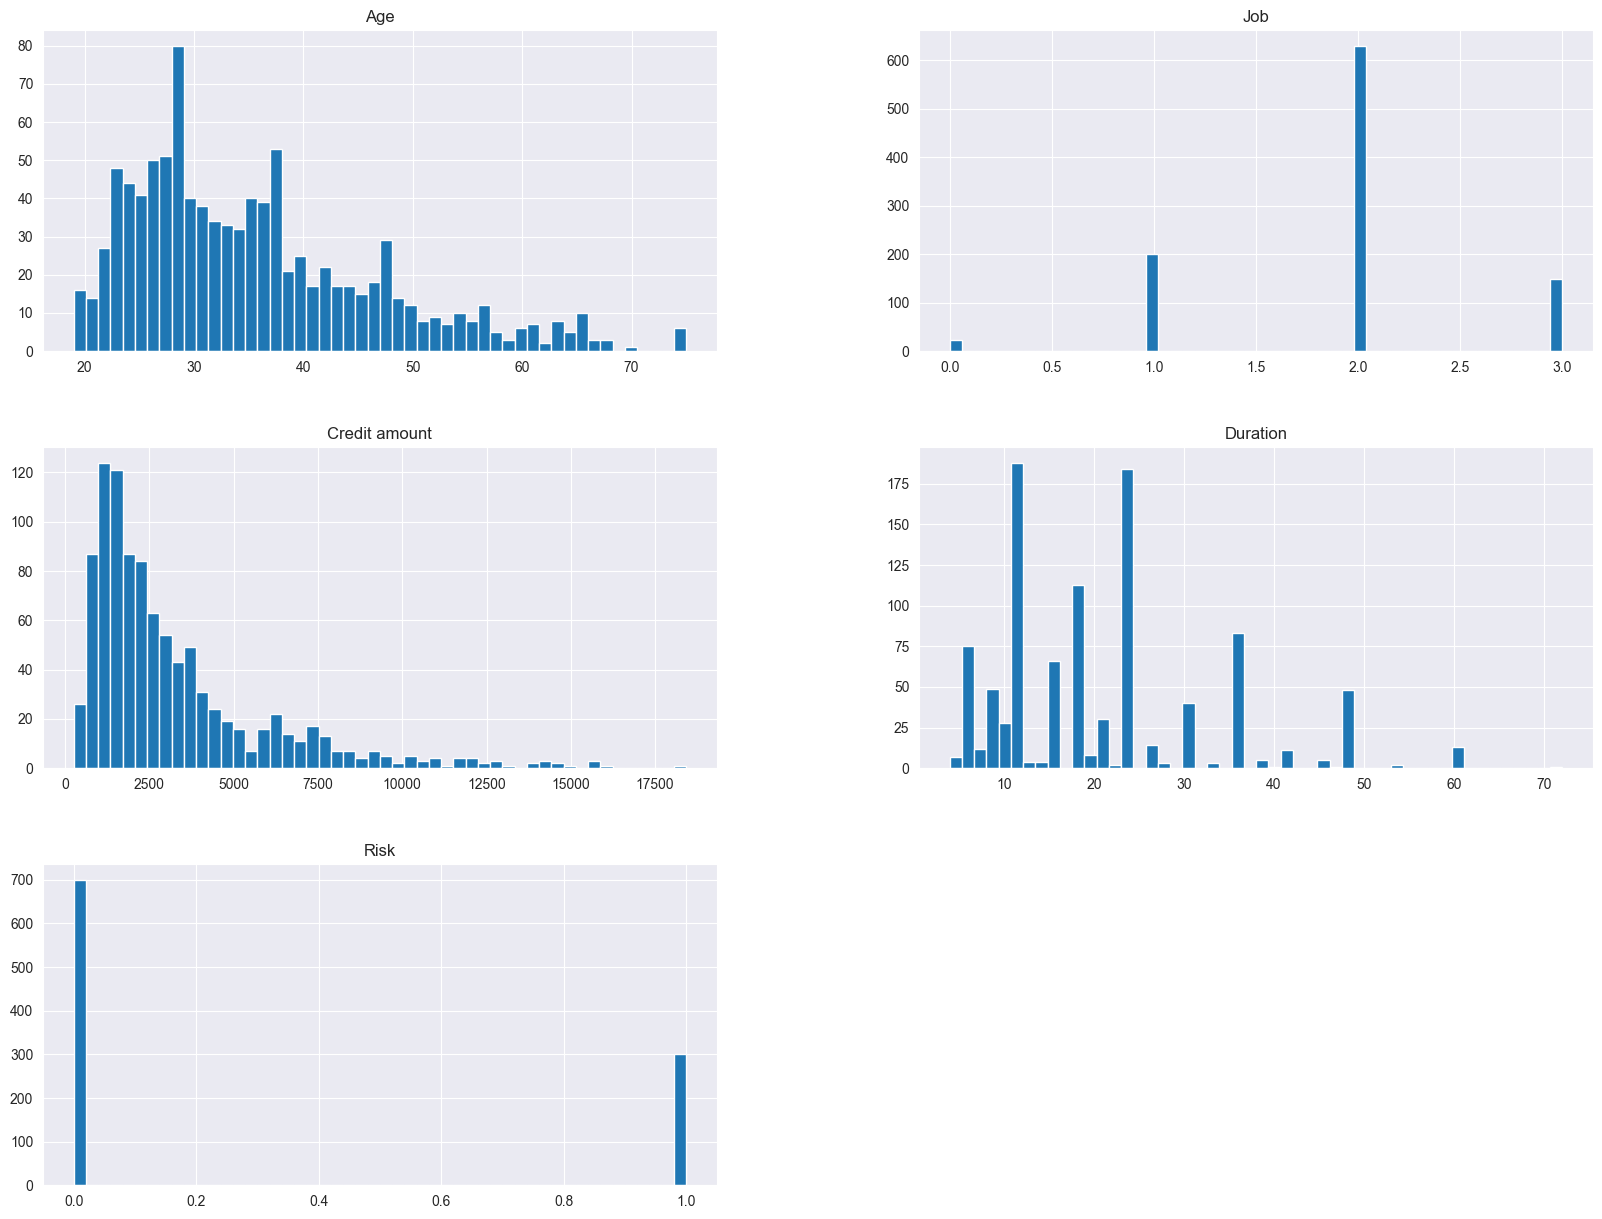

In [98]:
# Plot Histograms for the Numerical values
credit.hist(bins=50, figsize=(20,15))

### Box and Whisker Plot for all Numerical Values

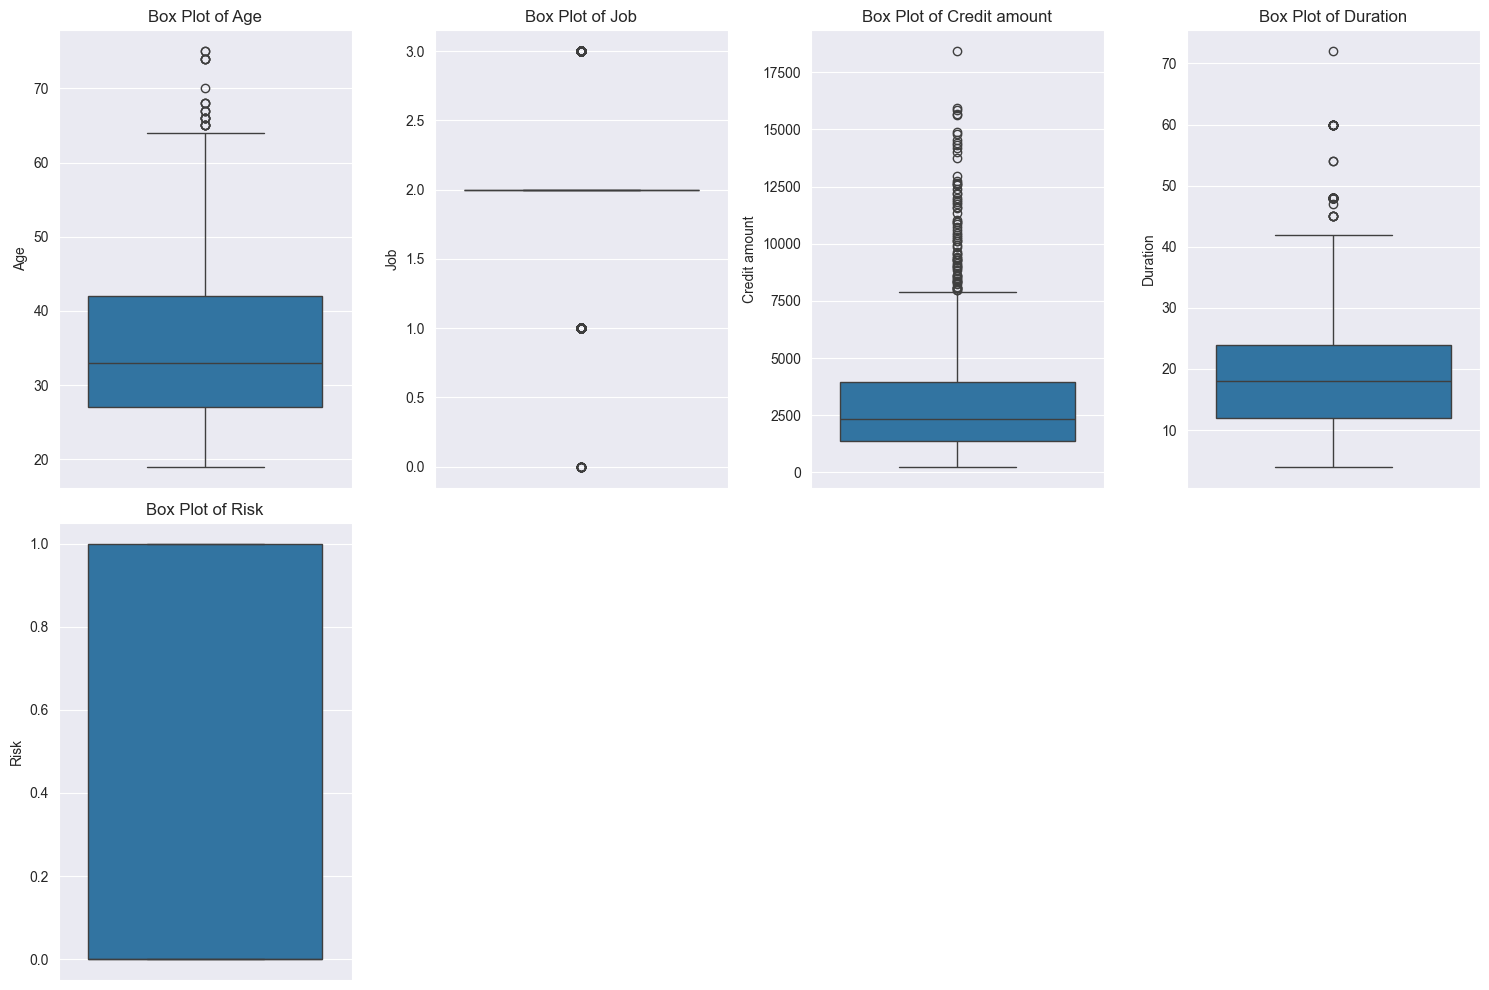

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = credit.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=credit[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### Unique Values in each of the categorical columns

In [100]:
# Find the unique values in each of the categorical columns
for col in credit.columns:
  if credit[col].dtype == 'object':
    print(f'{col}: {credit[col].unique()}')
    print()

Sex: ['male' 'female']

Housing: ['own' 'free' 'rent']

Saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']

Checking account: ['little' 'moderate' nan 'rich']

Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']



In [101]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [102]:
import numpy as np

# Define the possible values for Saving accounts
saving_values = ['little', 'moderate', 'quite rich', 'rich']

# Replace NaN values with random choices from the valid values
credit['Saving accounts'] = credit['Saving accounts'].apply(
    lambda x: np.random.choice(saving_values) if pd.isna(x) else x
)

# Verify no missing values remain
print("Missing values in Saving accounts:", credit['Saving accounts'].isnull().sum())
print("\nValue counts after replacement:")
print(credit['Saving accounts'].value_counts())

Missing values in Saving accounts: 0

Value counts after replacement:
Saving accounts
little        658
moderate      140
quite rich    106
rich           96
Name: count, dtype: int64


In [103]:
# Define the possible values for Checking account
checking_values = ['little', 'moderate', 'rich']

# Replace NaN values with random choices from the valid values
credit['Checking account'] = credit['Checking account'].apply(
    lambda x: np.random.choice(checking_values) if pd.isna(x) else x
)

# Verify no missing values remain
print("Missing values in Checking account:", credit['Checking account'].isnull().sum())
print("\nValue counts after replacement:")
print(credit['Checking account'].value_counts())

Missing values in Checking account: 0

Value counts after replacement:
Checking account
moderate    410
little      398
rich        192
Name: count, dtype: int64


In [104]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


# Data Cleaning

### Normalize Numerical Columns

In [105]:
# Normalize these columns using Standscaler - [balance, duration, pdays, previous]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit[['Credit amount']] = scaler.fit_transform(credit[['Credit amount']])
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,3.554600e+01,11.375469,19.000000,27.000000,33.000000,42.000000,75.000000
Job,1000.0,1.904000e+00,0.653614,0.000000,2.000000,2.000000,2.000000,3.000000
Credit amount,1000.0,6.661338e-17,1.000500,-1.070865,-0.675483,-0.337344,0.248462,5.370789
Duration,1000.0,2.090300e+01,12.058814,4.000000,12.000000,18.000000,24.000000,72.000000
Risk,1000.0,3.000000e-01,0.458487,0.000000,0.000000,0.000000,1.000000,1.000000


### Data Distribution After Normalizing Numerical Variables

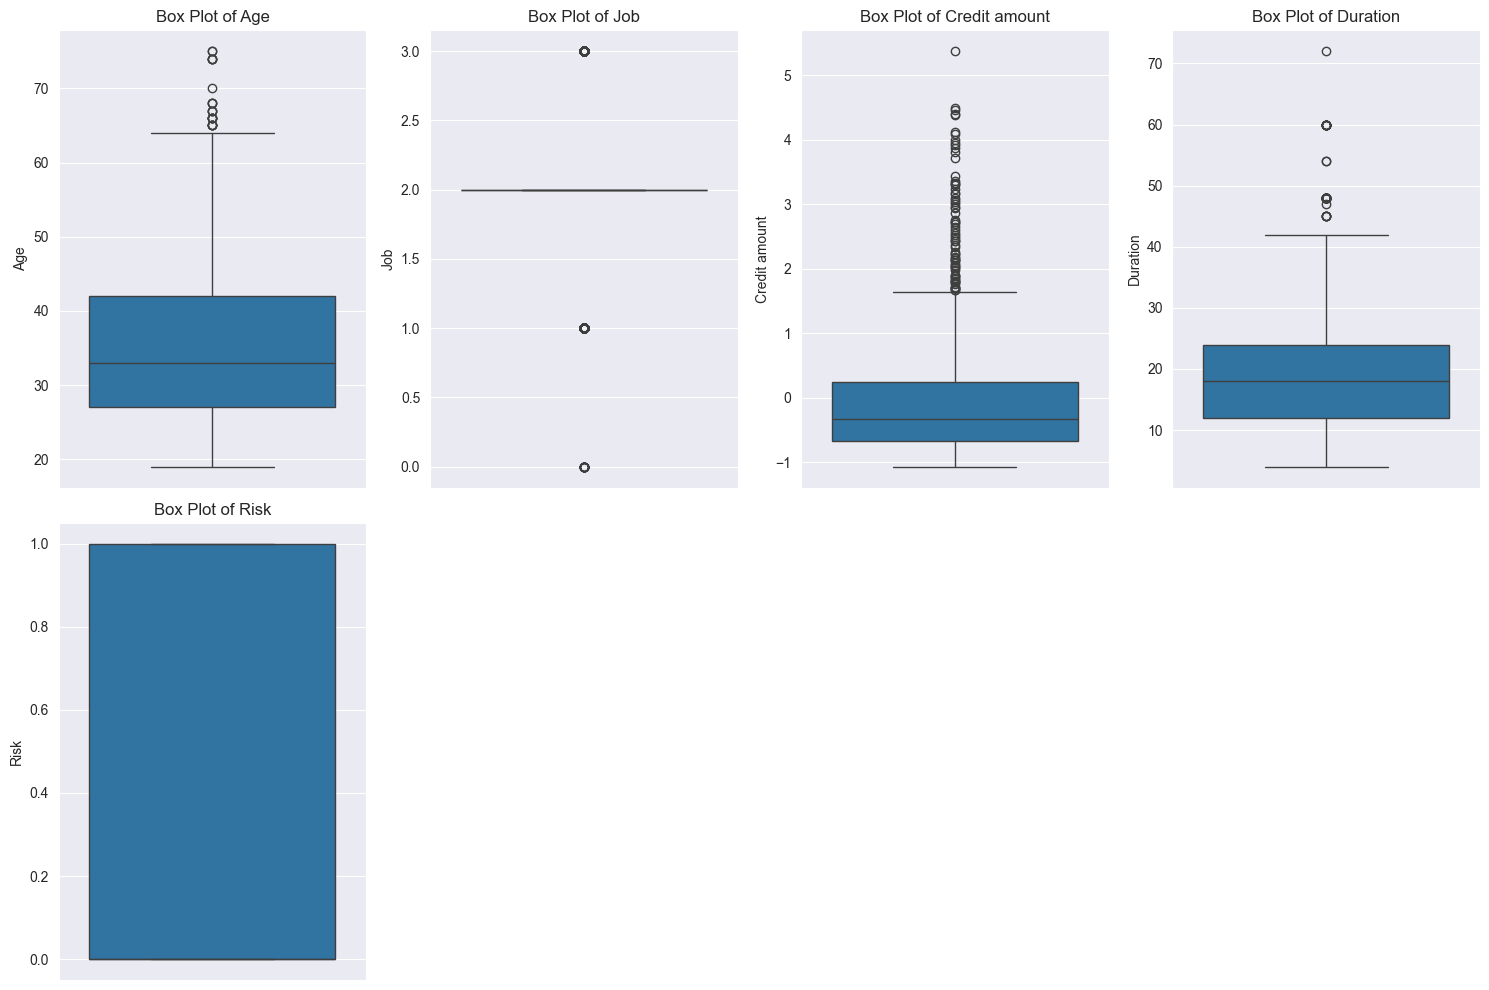

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = credit.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=credit[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [107]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,rich,little,-0.745131,6,radio/TV,0
1,22,female,2,own,little,moderate,0.949817,48,radio/TV,1
2,49,male,1,own,little,little,-0.416562,12,education,0
3,45,male,2,free,little,little,1.634247,42,furniture/equipment,0
4,53,male,2,free,little,little,0.566664,24,car,1


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Risk'}>, <Axes: >]], dtype=object)

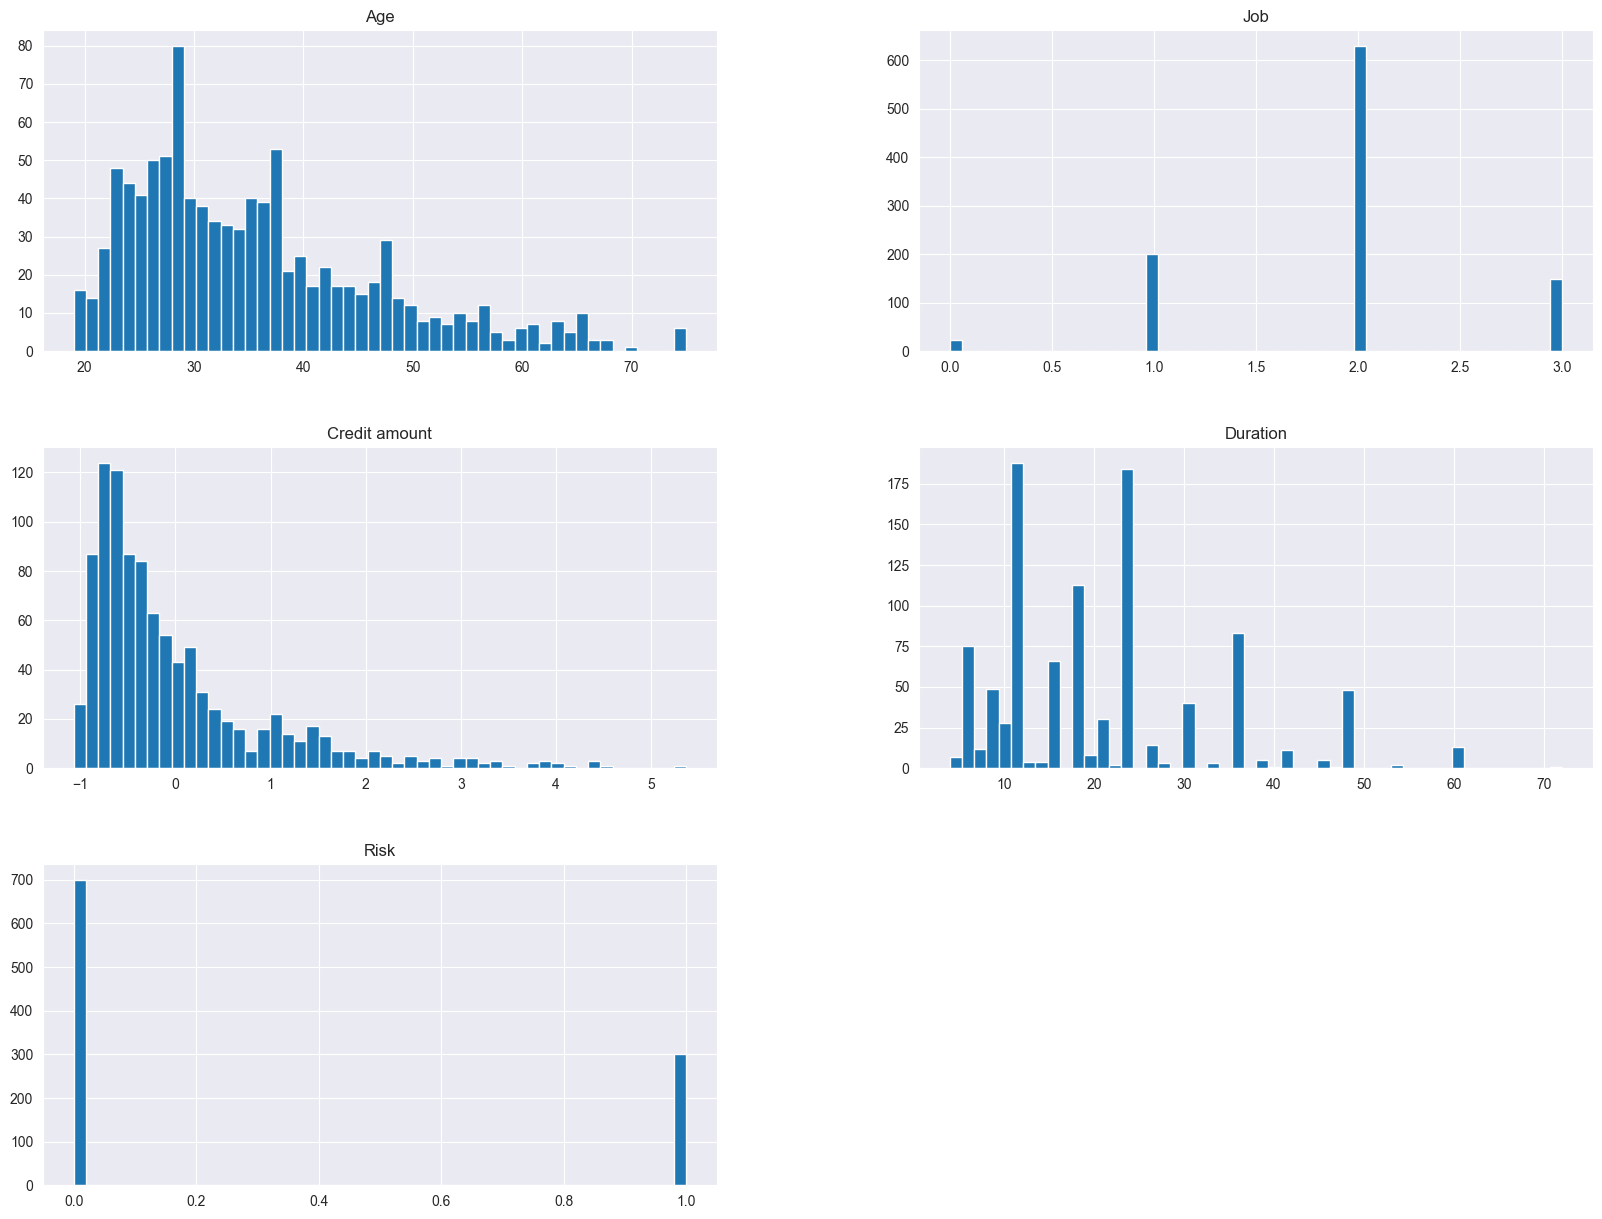

In [108]:
# Plot Histograms for the Numerical values
credit.hist(bins=50, figsize=(20,15))

### Remove outliers from the data - numerical values

In [109]:
# Remove outliers using the IQR method
numerical_cols = credit.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = credit[col].quantile(0.25)
    Q3 = credit[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    credit = credit[(credit[col] >= lower_bound) & (credit[col] <= upper_bound)]

print(f"Shape of the DataFrame after removing outliers: {credit.shape}")

Shape of the DataFrame after removing outliers: (548, 10)


In [110]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 4 to 997
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               548 non-null    int64  
 1   Sex               548 non-null    object 
 2   Job               548 non-null    int64  
 3   Housing           548 non-null    object 
 4   Saving accounts   548 non-null    object 
 5   Checking account  548 non-null    object 
 6   Credit amount     548 non-null    float64
 7   Duration          548 non-null    int64  
 8   Purpose           548 non-null    object 
 9   Risk              548 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 47.1+ KB


### Data Distribution After Removing Outliers

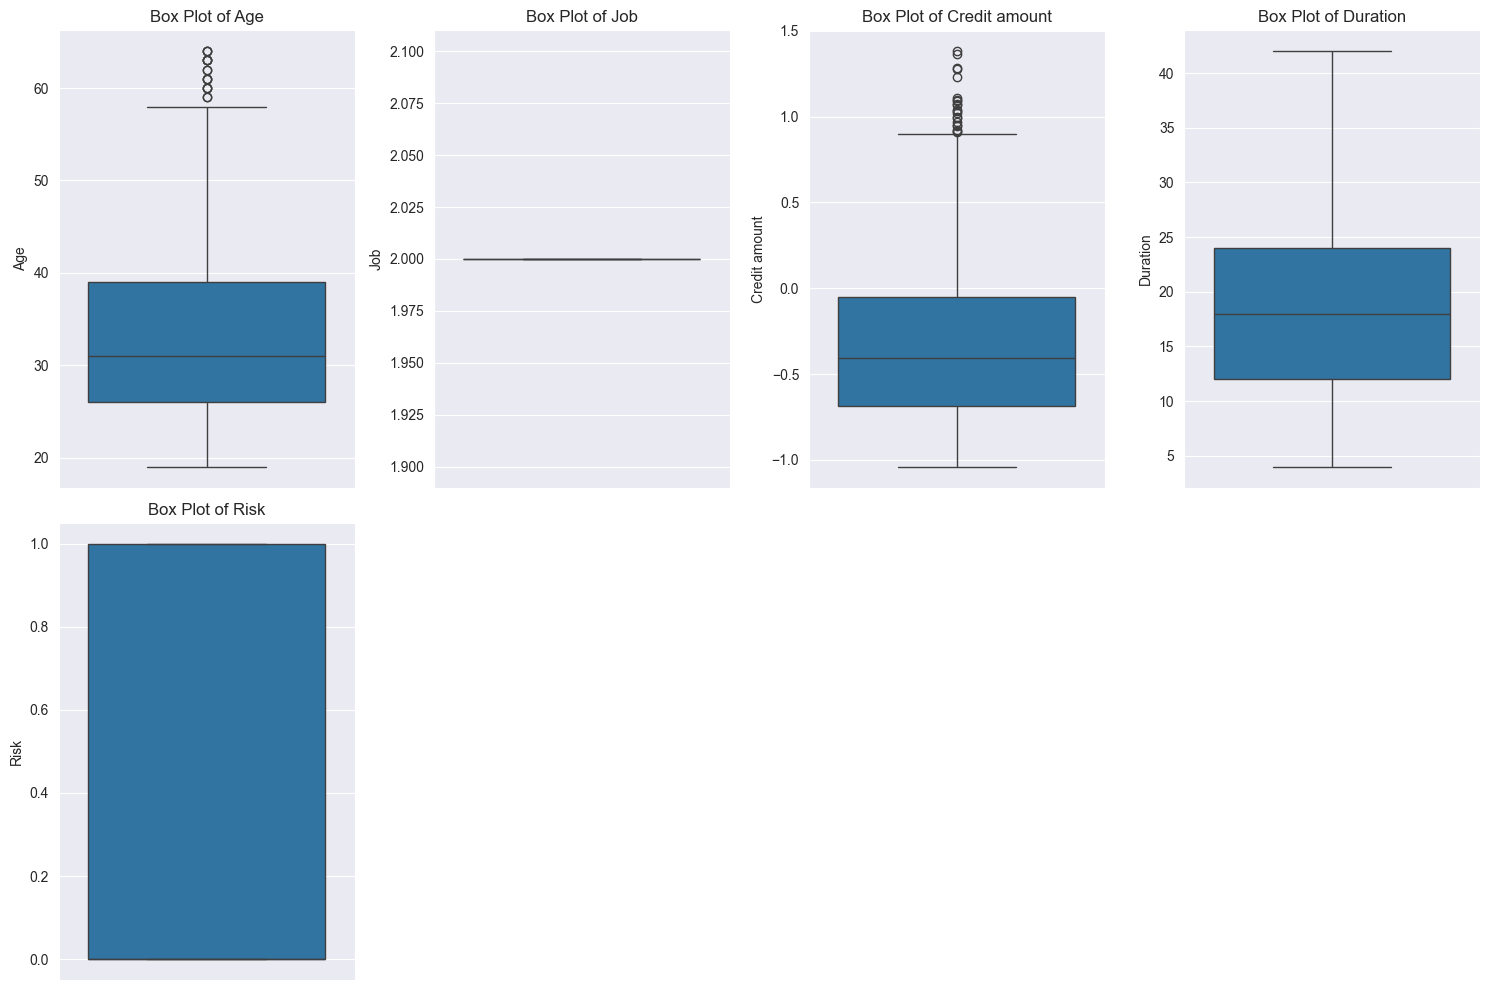

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = credit.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=credit[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [112]:
credit.info()
credit['Risk'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 4 to 997
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               548 non-null    int64  
 1   Sex               548 non-null    object 
 2   Job               548 non-null    int64  
 3   Housing           548 non-null    object 
 4   Saving accounts   548 non-null    object 
 5   Checking account  548 non-null    object 
 6   Credit amount     548 non-null    float64
 7   Duration          548 non-null    int64  
 8   Purpose           548 non-null    object 
 9   Risk              548 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 47.1+ KB


Risk
0    405
1    143
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Risk'}>, <Axes: >]], dtype=object)

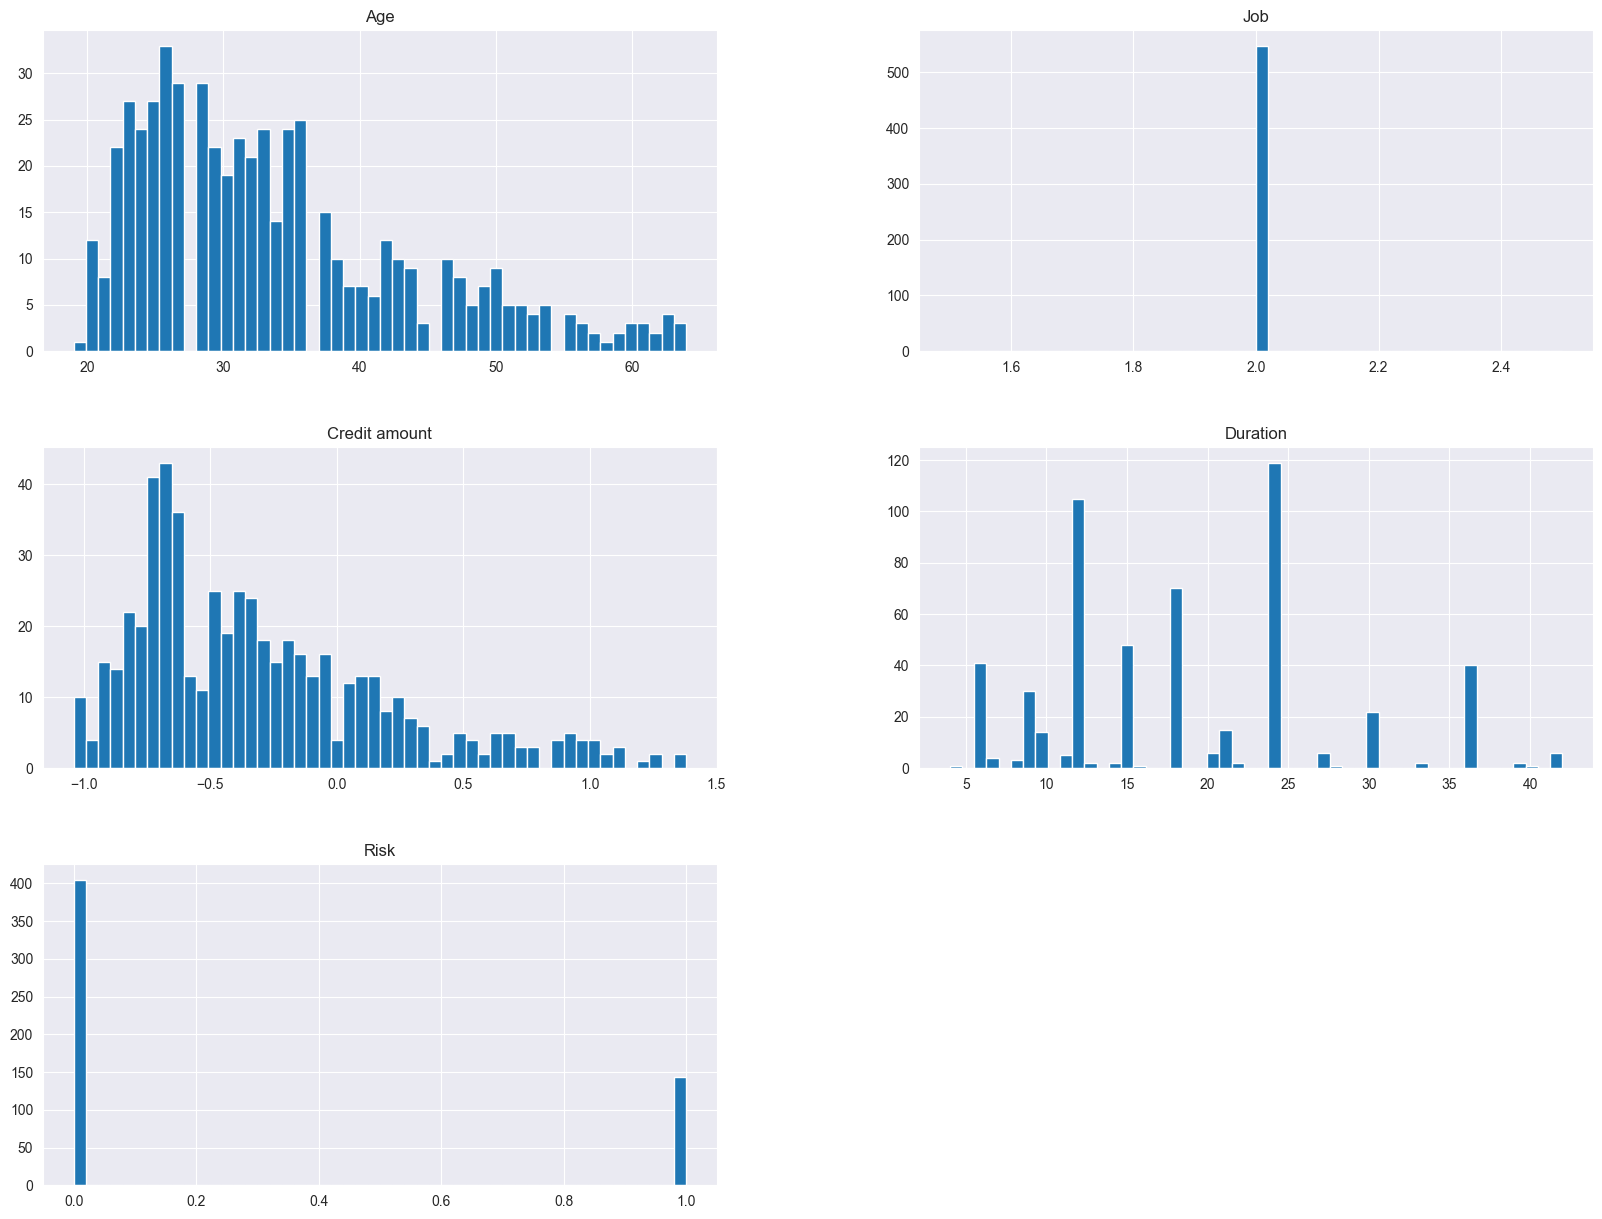

In [113]:
# Plot Histograms for the Numerical values
credit.hist(bins=50, figsize=(20,15))

### Encode the Categorical Variables

In [114]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode specified columns
one_hot_cols = ['Age', 'Sex', 'Purpose']
credit = pd.get_dummies(credit, columns=one_hot_cols, drop_first=True)

# Label encode specified columns
label_encode_cols = ['Saving accounts', 'Checking account', 'Housing']
for col in label_encode_cols:
    le = LabelEncoder()
    credit[col] = le.fit_transform(credit[col])

print("DataFrame after encoding categorical variables:")
display(credit.head())

DataFrame after encoding categorical variables:


,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Age_20,Age_21,Age_22,...,Age_63,Age_64,Sex_male,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
4,2,0,0,0,0.566664,24,1,False,False,False,...,False,False,True,True,False,False,False,False,False,False
6,2,1,2,2,-0.154629,24,0,False,False,False,...,False,False,True,False,False,False,True,False,False,False
10,2,2,0,1,-0.700472,12,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
12,2,1,0,1,-0.604063,12,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
14,2,2,0,0,-0.662192,15,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [115]:
# Information on resulting data
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 4 to 997
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job                          548 non-null    int64  
 1   Housing                      548 non-null    int64  
 2   Saving accounts              548 non-null    int64  
 3   Checking account             548 non-null    int64  
 4   Credit amount                548 non-null    float64
 5   Duration                     548 non-null    int64  
 6   Risk                         548 non-null    int64  
 7   Age_20                       548 non-null    bool   
 8   Age_21                       548 non-null    bool   
 9   Age_22                       548 non-null    bool   
 10  Age_23                       548 non-null    bool   
 11  Age_24                       548 non-null    bool   
 12  Age_25                       548 non-null    bool   
 13  Age_26                   

In [116]:
# Label Encode all the boolean variables.
for col in credit.columns:
  if credit[col].dtype == 'bool':
    credit[col] = credit[col].astype(int)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 4 to 997
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job                          548 non-null    int64  
 1   Housing                      548 non-null    int64  
 2   Saving accounts              548 non-null    int64  
 3   Checking account             548 non-null    int64  
 4   Credit amount                548 non-null    float64
 5   Duration                     548 non-null    int64  
 6   Risk                         548 non-null    int64  
 7   Age_20                       548 non-null    int64  
 8   Age_21                       548 non-null    int64  
 9   Age_22                       548 non-null    int64  
 10  Age_23                       548 non-null    int64  
 11  Age_24                       548 non-null    int64  
 12  Age_25                       548 non-null    int64  
 13  Age_26                   

In [117]:
# Save the resulting data to drive
credit.to_csv('credit_cleaned.csv', index=False)

In [118]:
credit_cleaned = pd.read_csv('credit_cleaned.csv')
credit_cleaned.head()

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Age_20,Age_21,Age_22,...,Age_63,Age_64,Sex_male,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2,0,0,0,0.566664,24,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,2,1,2,2,-0.154629,24,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2,2,0,1,-0.700472,12,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2,1,0,1,-0.604063,12,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2,2,0,0,-0.662192,15,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Handle Data Imbalance

In [119]:
# Find the number of records per class
credit['Risk'].value_counts()

Risk
0    405
1    143
Name: count, dtype: int64

In [120]:
from imblearn.over_sampling import BorderlineSMOTE

# Separate features and target
X = credit.drop('Risk', axis=1)
y = credit['Risk']

# Check class distribution before SMOTE
print("Class distribution before Borderline SMOTE:")
print(y.value_counts())
print(f"Class ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}")

# Apply Borderline SMOTE
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("\nClass distribution after Borderline SMOTE:")
print(y_resampled.value_counts())
print(f"Total samples: {len(y_resampled)}")

# Create a new balanced dataframe
credit_smote = pd.DataFrame(X_resampled, columns=X.columns)
credit_smote['Risk'] = y_resampled

print("\nShape of resampled data:", credit_smote.shape)

Class distribution before Borderline SMOTE:
Risk
0    405
1    143
Name: count, dtype: int64
Class ratio: 2.83

Class distribution after Borderline SMOTE:
Risk
1    405
0    405
Name: count, dtype: int64
Total samples: 810

Shape of resampled data: (810, 60)


In [121]:
# Save the balanced dataset
credit_cleaned.to_csv('credit_balanced.csv', index=False)

# Feature Engineering

In [122]:
from collections import Counter

# Model Building


## Recursive Feature Elimination (RFE)

we applied Recursive Feature Elimination with Cross-Validation (RFECV) to identify the most important features for predicting term deposit subscription.

RFECV automatically determines the optimal number of features by:
- Recursively removing the least important features
- Using 5-fold cross-validation to evaluate performance at each step
- Selecting the feature subset that maximizes model accuracy

In [123]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve,
                             confusion_matrix, classification_report)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Load Data and Split into Train/Validation/Test Sets

In [124]:
# Load the balanced dataset
credit_data = pd.read_csv('credit_balanced.csv')

# Separate features and target
X = credit_data.drop('Risk', axis=1)
y = credit_data['Risk']

# First split: 60% train, 40% temp (for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Second split: Split temp into 50% validation, 50% test (20% each of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Dataset split completed:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nNumber of features: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

Dataset split completed:
Training set: 328 samples (59.9%)
Validation set: 110 samples (20.1%)
Test set: 110 samples (20.1%)

Number of features: 59

Class distribution in training set:
Risk
0    242
1     86
Name: count, dtype: int64


###  Apply RFECV for Feature Selection

In [125]:
# Initialize Logistic Regression as the estimator for RFECV
lr_estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Apply RFECV with 5-fold cross-validation
print("Running RFECV")
rfecv = RFECV(
    estimator=lr_estimator,
    step=1,
    cv=5,
    scoring='accuracy',
    min_features_to_select=5,
    n_jobs=-1
)

# Fit RFECV on training data
rfecv.fit(X_train, y_train)

# Get optimal number of features
optimal_features = rfecv.n_features_
print(f"\nOptimal number of features: {optimal_features}")
print(f"Features selected: {optimal_features}/{X_train.shape[1]}")

# Get selected feature names
selected_features = X_train.columns[rfecv.support_].tolist()
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Running RFECV

Optimal number of features: 5
Features selected: 5/59

Selected features:
1. Age_22
2. Age_25
3. Age_40
4. Age_43
5. Age_49


###  Visualize RFECV Results

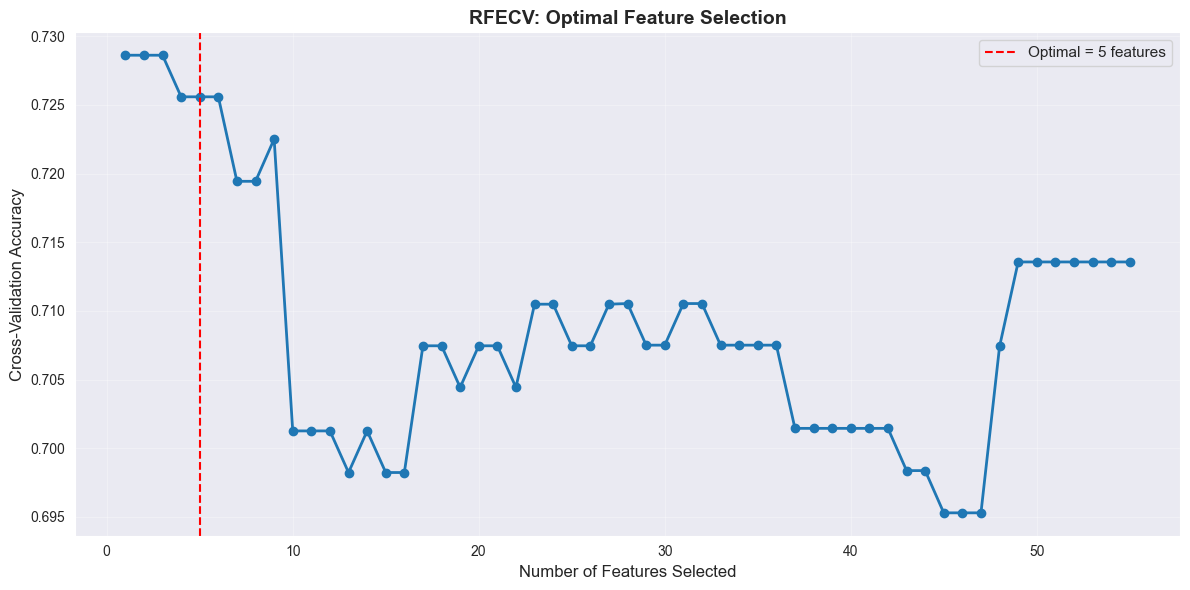

Maximum CV accuracy: 0.7286


In [126]:
# Plot the cross-validation scores vs. number of features
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'],
         marker='o', linewidth=2, markersize=6)
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('RFECV: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.axvline(x=optimal_features, color='r', linestyle='--',
            label=f'Optimal = {optimal_features} features')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Maximum CV accuracy: {rfecv.cv_results_['mean_test_score'].max():.4f}")

In [127]:
# Create datasets with selected features only
X_train_rfe = X_train[selected_features]
X_val_rfe = X_val[selected_features]
X_test_rfe = X_test[selected_features]

print(f"Baseline feature set: {X_train.shape[1]} features")
print(f"RFE-optimized feature set: {X_train_rfe.shape[1]} features")
print(f"Feature reduction: {X_train.shape[1] - X_train_rfe.shape[1]} features removed")

Baseline feature set: 59 features
RFE-optimized feature set: 5 features
Feature reduction: 54 features removed


In [128]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
import numpy as np

print("Running SelectKBest with f_classif")

# Test different k values to find optimal
k_range = range(5, X_train.shape[1] + 1, 5)  # Test every 5 features
scores = []

lr_estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

for k in k_range:
  selector = SelectKBest(score_func=f_classif, k=k)
  X_train_temp = selector.fit_transform(X_train, y_train)

  # Cross-validate
  cv_score = cross_val_score(lr_estimator, X_train_temp, y_train,
                             cv=5, scoring='accuracy', n_jobs=-1).mean()
  scores.append(cv_score)
  print(f"k={k}: CV accuracy={cv_score:.4f}")

# Find optimal k
optimal_k = k_range[np.argmax(scores)]
print(f"\nOptimal number of features: {optimal_k}")

# Apply SelectKBest with optimal k
k_best = SelectKBest(score_func=f_classif, k=optimal_k)
k_best.fit(X_train, y_train)

# Transform the data
X_train_selected = k_best.transform(X_train)
X_test_selected = k_best.transform(X_test)

# Get selected feature names
optimal_features_b_best = X_train.columns[k_best.get_support()].tolist()
print(f"\nSelected features: {len(optimal_features_b_best)}/{X_train.shape[1]}")
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
  print(f"{i}. {feature}")

# Get feature scores
feature_scores = pd.DataFrame({
  'Feature': X_train.columns,
  'Score': k_best.scores_
}).sort_values('Score', ascending=False)

print(f"\nTop 10 features by score:")
print(feature_scores.head(10))

# Plot the cross-validation scores vs. number of features

Running SelectKBest with f_classif
k=5: CV accuracy=0.7378
k=10: CV accuracy=0.7257
k=15: CV accuracy=0.7288
k=20: CV accuracy=0.7227
k=25: CV accuracy=0.7257
k=30: CV accuracy=0.7014
k=35: CV accuracy=0.7045
k=40: CV accuracy=0.7075
k=45: CV accuracy=0.7045
k=50: CV accuracy=0.6984
k=55: CV accuracy=0.7106

Optimal number of features: 5

Selected features: 5/59

Selected features:
1. Age_22
2. Age_25
3. Age_40
4. Age_43
5. Age_49

Top 10 features by score:
              Feature     Score
2     Saving accounts  8.475205
5            Duration  5.385327
1             Housing  4.856073
8              Age_22  4.305158
3    Checking account  3.861215
11             Age_25  2.677673
54  Purpose_education  2.091400
51           Sex_male  2.014065
35             Age_49  1.803283
26             Age_40  1.803283


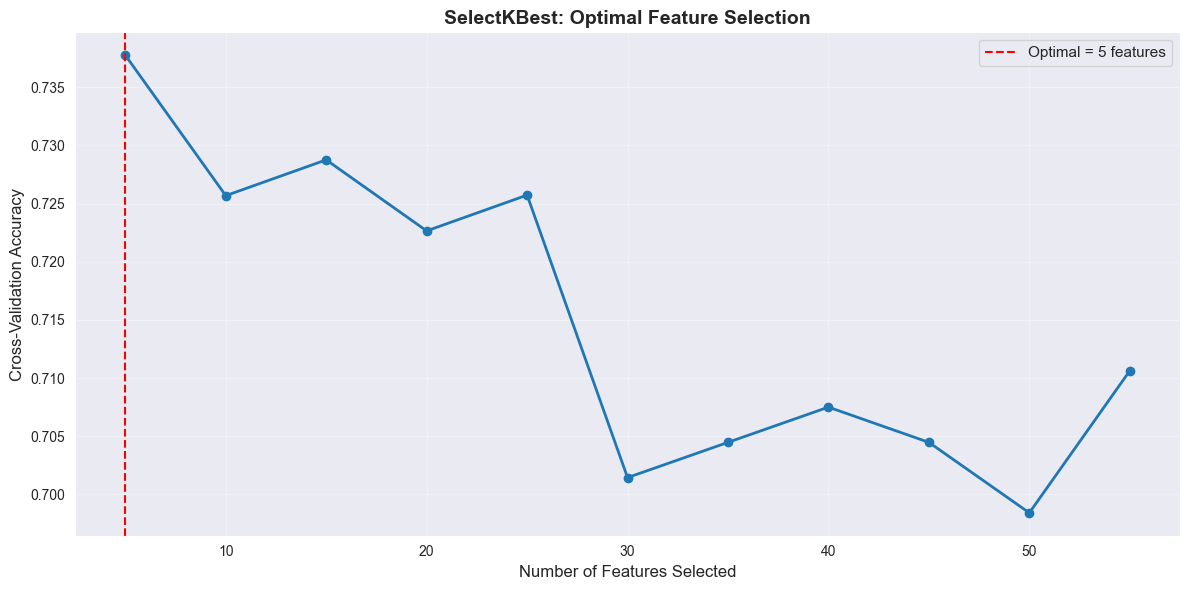

Maximum CV accuracy: 0.7378


In [129]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, marker='o', linewidth=2, markersize=6)
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('SelectKBest: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.axvline(x=optimal_k, color='r', linestyle='--',
          label=f'Optimal = {optimal_k} features')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Maximum CV accuracy: {max(scores):.4f}")

# Hyperparameter Tuning

In [130]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    """
    Train a model and evaluate it on validation and test sets.
    Returns a dictionary with all performance metrics.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Get probability predictions for ROC-AUC (if available)
    if hasattr(model, 'predict_proba'):
        y_val_proba = model.predict_proba(X_val)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_val_proba = model.decision_function(X_val)
        y_test_proba = model.decision_function(X_test)

    # Calculate metrics for validation set
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'precision': precision_score(y_val, y_val_pred),
        'recall': recall_score(y_val, y_val_pred),
        'f1': f1_score(y_val, y_val_pred),
        'roc_auc': roc_auc_score(y_val, y_val_proba)
    }

    # Calculate metrics for test set
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, y_test_proba)
    }

    return {
        'model': model,
        'model_name': model_name,
        'val_metrics': val_metrics,
        'test_metrics': test_metrics,
        'y_val_pred': y_val_pred,
        'y_test_pred': y_test_pred,
        'y_val_proba': y_val_proba,
        'y_test_proba': y_test_proba
    }

In [131]:
print("Training baseline models with all 29 features...\n")

# Initialize baseline models
models_baseline = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
}

# Train and evaluate baseline models
results_baseline = {}
for name, model in models_baseline.items():
    print(f"Training {name} (Baseline)...")
    results_baseline[name] = evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test, f"{name} (Baseline)"
    )
    print(f"  Validation Accuracy: {results_baseline[name]['val_metrics']['accuracy']:.4f}")
    print(f"  Test Accuracy: {results_baseline[name]['test_metrics']['accuracy']:.4f}\n")

print("Baseline models training completed!")

Training baseline models with all 29 features...

Training Logistic Regression (Baseline)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7364

Training Random Forest (Baseline)...
  Validation Accuracy: 0.7273
  Test Accuracy: 0.7182

Training SVM (Baseline)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7455

Baseline models training completed!


# Model Deployment

In [132]:
print(f"Training RFE-optimized models with {optimal_features} selected features...\n")

# Initialize RFE-optimized models
models_rfe = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
}

# Train and evaluate RFE-optimized models
results_rfe = {}
for name, model in models_rfe.items():
    print(f"Training {name} (RFE)...")
    results_rfe[name] = evaluate_model(
        model, X_train_rfe, y_train, X_val_rfe, y_val, X_test_rfe, y_test, f"{name} (RFE)"
    )
    print(f"  Validation Accuracy: {results_rfe[name]['val_metrics']['accuracy']:.4f}")
    print(f"  Test Accuracy: {results_rfe[name]['test_metrics']['accuracy']:.4f}\n")


Training RFE-optimized models with 5 selected features...

Training Logistic Regression (RFE)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7455

Training Random Forest (RFE)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7455

Training SVM (RFE)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7455



In [133]:
print(f"Training SelectKBest-optimized models with {optimal_features_b_best} selected features...\n")

# Transform train, validation, and test sets
X_train_selected = k_best.transform(X_train)
X_val_selected = k_best.transform(X_val)
X_test_selected = k_best.transform(X_test)

# Initialize SelectKBest-optimized models
models_kbest = {
  'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
  'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
  'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
}

# Train and evaluate SelectKBest-optimized models
results_kbest = {}
for name, model in models_kbest.items():
  print(f"Training {name} (SelectKBest)...")
  results_kbest[name] = evaluate_model(
      model, X_train_selected, y_train, X_val_selected, y_val, X_test_selected, y_test, f"{name} (SelectKBest)"
  )
  print(f"  Validation Accuracy: {results_kbest[name]['val_metrics']['accuracy']:.4f}")
  print(f"  Test Accuracy: {results_kbest[name]['test_metrics']['accuracy']:.4f}\n")

Training SelectKBest-optimized models with ['Housing', 'Saving accounts', 'Checking account', 'Duration', 'Age_22'] selected features...

Training Logistic Regression (SelectKBest)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7545

Training Random Forest (SelectKBest)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7091

Training SVM (SelectKBest)...
  Validation Accuracy: 0.7364
  Test Accuracy: 0.7455



In [134]:
# Combine all results
all_results = {}
for name, result in results_baseline.items():
    all_results[f"{name} (Baseline)"] = result
for name, result in results_rfe.items():
    all_results[f"{name} (RFE)"] = result

# Create comparison dataframe for validation set
val_comparison = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [all_results[name]['val_metrics']['accuracy'] for name in all_results.keys()],
    'Precision': [all_results[name]['val_metrics']['precision'] for name in all_results.keys()],
    'Recall': [all_results[name]['val_metrics']['recall'] for name in all_results.keys()],
    'F1-Score': [all_results[name]['val_metrics']['f1'] for name in all_results.keys()],
    'ROC-AUC': [all_results[name]['val_metrics']['roc_auc'] for name in all_results.keys()]
})

# Create comparison dataframe for test set
test_comparison = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [all_results[name]['test_metrics']['accuracy'] for name in all_results.keys()],
    'Precision': [all_results[name]['test_metrics']['precision'] for name in all_results.keys()],
    'Recall': [all_results[name]['test_metrics']['recall'] for name in all_results.keys()],
    'F1-Score': [all_results[name]['test_metrics']['f1'] for name in all_results.keys()],
    'ROC-AUC': [all_results[name]['test_metrics']['roc_auc'] for name in all_results.keys()]
})


print("VALIDATION SET PERFORMANCE")
display(val_comparison.style.format({
    'Accuracy': '{:.4f}', 'Precision': '{:.4f}',
    'Recall': '{:.4f}', 'F1-Score': '{:.4f}', 'ROC-AUC': '{:.4f}'
}))


print("TEST SET PERFORMANCE")
display(test_comparison.style.format({
    'Accuracy': '{:.4f}', 'Precision': '{:.4f}',
    'Recall': '{:.4f}', 'F1-Score': '{:.4f}', 'ROC-AUC': '{:.4f}'
}))


VALIDATION SET PERFORMANCE


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression (Baseline),0.7364,0.5000,0.1724,0.2564,0.7629
1,Random Forest (Baseline),0.7273,0.4000,0.0690,0.1176,0.7373
2,SVM (Baseline),0.7364,0.0000,0.0000,0.0000,0.7003
3,Logistic Regression (RFE),0.7364,0.0000,0.0000,0.0000,0.5328
4,Random Forest (RFE),0.7364,0.0000,0.0000,0.0000,0.5315
5,SVM (RFE),0.7364,0.0000,0.0000,0.0000,0.5102


TEST SET PERFORMANCE


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression (Baseline),0.7364,0.4000,0.0714,0.1212,0.5993
1,Random Forest (Baseline),0.7182,0.3333,0.1071,0.1622,0.5997
2,SVM (Baseline),0.7455,0.0000,0.0000,0.0000,0.5571
3,Logistic Regression (RFE),0.7455,0.0000,0.0000,0.0000,0.4926
4,Random Forest (RFE),0.7455,0.0000,0.0000,0.0000,0.4952
5,SVM (RFE),0.7455,0.0000,0.0000,0.0000,0.4652


In [135]:
# Find the best performing model based on test set F1-score
best_model_idx = test_comparison['F1-Score'].idxmax()
best_model_name = test_comparison.loc[best_model_idx, 'Model']
best_f1 = test_comparison.loc[best_model_idx, 'F1-Score']
best_accuracy = test_comparison.loc[best_model_idx, 'Accuracy']
best_roc_auc = test_comparison.loc[best_model_idx, 'ROC-AUC']

print("=" * 80)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("=" * 80)
print(f"\nBest Performing Model: {best_model_name}")
print(f"  - F1-Score: {best_f1:.4f}")
print(f"  - Accuracy: {best_accuracy:.4f}")
print(f"  - ROC-AUC: {best_roc_auc:.4f}")

print(f"\n\nFeature Selection Impact:")
print(f"  - Original features: 29")
print(f"  - Selected features: {optimal_features}")
print(f"  - Features removed: {29 - optimal_features} ({(29 - optimal_features)/29*100:.1f}% reduction)")

print(f"\n\nKey Insights:")
print(f" RFECV identified {optimal_features} most important features for prediction")
print(f" Feature reduction from 29 to {optimal_features} features")

# Compare baseline vs RFE for each model
print(f"\n Performance Impact of RFE:")
for model_type in ['Logistic Regression', 'Random Forest', 'SVM']:
    baseline_f1 = test_comparison[test_comparison['Model'] == f'{model_type} (Baseline)']['F1-Score'].values[0]
    rfe_f1 = test_comparison[test_comparison['Model'] == f'{model_type} (RFE)']['F1-Score'].values[0]
    improvement = ((rfe_f1 - baseline_f1) / baseline_f1) * 100
    symbol = "+" if improvement > 0 else "-"
    print(f"   - {model_type}: {baseline_f1:.4f} → {rfe_f1:.4f} ({symbol} {abs(improvement):.2f}%)")

print(f"\n\nSelected Features ({optimal_features} total):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

FINAL SUMMARY AND RECOMMENDATIONS

Best Performing Model: Random Forest (Baseline)
  - F1-Score: 0.1622
  - Accuracy: 0.7182
  - ROC-AUC: 0.5997


Feature Selection Impact:
  - Original features: 29
  - Selected features: 5
  - Features removed: 24 (82.8% reduction)


Key Insights:
 RFECV identified 5 most important features for prediction
 Feature reduction from 29 to 5 features

 Performance Impact of RFE:
   - Logistic Regression: 0.1212 → 0.0000 (- 100.00%)
   - Random Forest: 0.1622 → 0.0000 (- 100.00%)
   - SVM: 0.0000 → 0.0000 (- nan%)


Selected Features (5 total):
  1. Age_22
  2. Age_25
  3. Age_40
  4. Age_43
  5. Age_49
